In [1]:
import numpy as np
import xarray as xray
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from pop_gradient import agg_and_gradient
reload(agg_and_gradient)

<module 'pop_gradient.agg_and_gradient' from 'pop_gradient/agg_and_gradient.py'>

In [10]:
basedir = '/data/scratch/takaya/POP_data/Surface_Daily/'

In [20]:
fname = os.path.join(basedir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-01-01.nc')
ds = xray.open_dataset(fname, decode_times=False)
nroll = -1100
mask = ds.KMT > 1
lat = ds.TLAT.where(mask).roll(nlon=nroll)
lon = ds.TLONG.where(mask).roll(nlon=nroll)

In [45]:
p = agg_and_gradient.POPFile(fname)

In [22]:
xs, xe = (0, 3500); ys, ye = (300, 2100)
lat_interp = p.interpolate_2d(np.ma.masked_invalid(lat[ys:ye, xs:xe].values))
lon_interp = p.interpolate_2d(np.ma.masked_invalid(lon[ys:ye, xs:xe].values))

In [23]:
print np.isnan(lat_interp).any(), np.isnan(lon_interp).any()

False False


In [14]:
y_new = np.arange(-61., 62.)
x_new = np.arange(9., 351.)
xx_new, yy_new = np.meshgrid(x_new, y_new)

In [46]:
SST_46_01 = p.aggregate_latlon(lat_interp, lon_interp, yy_new, xx_new, 
                              iend=xe, jstart=ys, jend=ye)

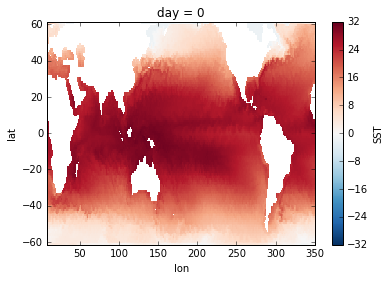

In [47]:
SST_46_01.SST[0].plot()